In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
from load_data import load_categorical_more_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
import time
import seaborn as sns
from xgboost import XGBRegressor


In [2]:
import openpyxl 
import os

In [3]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_true)-MinMaxNormal(y_pred))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [5]:
"""
Use Decision Tree to fit the relationship between 
homeless_real_value and other variables, except 
no_longer_homeless, prevention_duty, and relief duty.
"""

#Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2021,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

affordableRent_start,social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [6]:
data_table = categorical_data.drop(labels='Local',axis = 1)
data_table = data_table.drop(labels='Local Authority code',axis = 1)
data_table = data_table.drop(labels='Local Authority name',axis = 1)
data_table = data_table.drop(labels='Homeless (including intentionally homeless)',axis = 1)
data_table = data_table.drop(labels='Threatened with homelessness within 56 days - Prevention duty owed',axis = 1)
data_table = data_table.drop(labels='Homeless - Relief duty owed4',axis = 1)
data_table = data_table.drop(labels='Intermediate Rent (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Intermediate Rent (Completions)',axis = 1)
data_table = data_table.drop(labels='Affordable Home Ownership (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Affordable Home Ownership (Completions)',axis = 1)
data_table = data_table.drop(labels='Market (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Market  (Completions)',axis = 1)
data_table = data_table.drop(labels='C_D_property_counts',axis = 1)
data_table = data_table.drop(labels='E_F_property_counts',axis = 1)
data_table = data_table.drop(labels='G_H_property_counts',axis = 1)
data_table = data_table.drop(labels='median_houses_2020',axis = 1)
data_table = data_table.drop(labels='median_earning_2020',axis = 1)
data_table = data_table.drop(labels='ratio_by_medians_2020',axis = 1)
data_table = data_table.drop(labels='Total Affordable (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Total Affordable (Completions)',axis = 1)
data_table = data_table.drop(labels='Total (Starts on Site)',axis = 1)
data_table = data_table.drop(labels='Total (Completions)',axis = 1)
data_table = data_table.drop(labels='lower_quatile_houses_2020',axis = 1)
data_table = data_table.drop(labels='lower_quatile_earning_2020',axis = 1)

In [7]:
data_table.columns

Index(['Total owed a prevention or relief duty',
       'Number of households in area4 (000s)',
       'Total households with support needs', 'Total secured accommodation',
       'Size_of_social_housing_waiting_list_2021', '2021 Total Lettings',
       'Affordable Rent (Starts on Site)', 'Social Rent (Starts on Site)',
       'Affordable Rent (Completions)', 'Social Rent (Completions)',
       'A_B_property_counts', 'ratio_by_lower_quatile_2020'],
      dtype='object')

In [8]:
# feature_space = data_table.iloc[:, data_table.columns != 'Total owed a prevention or relief duty'].astype('float')
# feature_class = data_table.iloc[:, data_table.columns == 'Total owed a prevention or relief duty'].astype('int')

In [9]:
data_table.head(5)

,Total owed a prevention or relief duty,Number of households in area4 (000s),Total households with support needs,Total secured accommodation,Size_of_social_housing_waiting_list_2021,2021 Total Lettings,Affordable Rent (Starts on Site),Social Rent (Starts on Site),Affordable Rent (Completions),Social Rent (Completions),A_B_property_counts,ratio_by_lower_quatile_2020
1,139,28.205,90,0,741,11,0,32,0,0,7860,10.96
2,507,50.05,377,200,3710,96,70,0,98,0,24030,5.97
3,99,38.3,42,37,1468,71,107,9,43,0,2990,11.68
4,121,24.223,107,52,1010,96,25,0,0,0,11710,6.79
5,731,81.651,325,36,1226,290,46,0,11,0,48950,5.72


In [10]:
feature_space.columns

Index(['Number of households in area4 (000s)',
       'Total households with support needs', 'Total secured accommodation',
       'Size_of_social_housing_waiting_list_2021', '2021 Total Lettings',
       'Affordable Rent (Starts on Site)', 'Social Rent (Starts on Site)',
       'Affordable Rent (Completions)', 'Social Rent (Completions)',
       'A_B_property_counts', 'ratio_by_lower_quatile_2020'],
      dtype='object')

In [ ]:
# sns.pairplot(data_table)

In [ ]:
# SelectKBest(chi2, k=8).fit_transform(feature_space, feature_class)

In [ ]:

# data_scaled = StandardScaler().fit_transform(data_table.values)
# data_scaled_df = pd.DataFrame(data_scaled, index=data_table.index, columns=data_table.columns)


In [12]:
X = data_table.iloc[:, data_table.columns != 'Total owed a prevention or relief duty'].astype('float')
y = data_table.iloc[:, data_table.columns == 'Total owed a prevention or relief duty'].astype('int')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
xgb_model = XGBRegressor().fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9132499197250196


In [15]:
thresholds = np.sort(xgb_model.feature_importances_)
print(thresholds)

[0.00192725 0.00406726 0.00423671 0.00614568 0.02205451 0.02626085
 0.03680804 0.05616111 0.08307554 0.229623   0.52964   ]


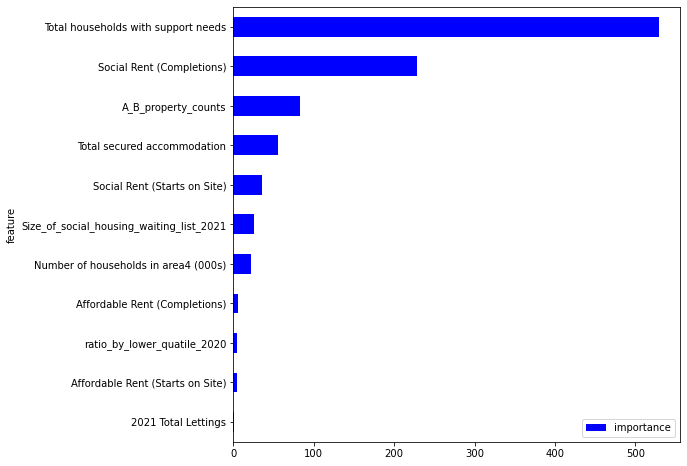

In [16]:
importances_values = xgb_model.feature_importances_
importances = pd.DataFrame(importances_values, columns=["importance"])
feature_data = pd.DataFrame(X_train.columns, columns=["feature"])
importance = pd.concat([feature_data, importances], axis=1)

importance = importance.sort_values(["importance"], ascending=True)
importance["importance"] = (importance["importance"] * 1000).astype(int)
importance = importance.sort_values(["importance"])
importance.set_index('feature', inplace=True)
importance.plot.barh(color='b', rot=0, figsize=(8, 8))
plt.legend(loc="lower right")
plt.show()